In [31]:
pip install folium

In [32]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
pip install mysql-connector-python geopandas

In [34]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="Localhost",
    user="root",
    password="JAswanth@@11",
    database="crimedata"
)

# Query the dataset
query = "SELECT * FROM china_crime_dataset"
df = pd.read_sql(query, conn)

C:\Users\jpabb\AppData\Local\Temp\ipykernel_13756\4219619928.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [35]:
df.head()

,Crime_Type,Location,Timestamp,Age,Gender,Weapon_Used,Crime_Scene
0,Cyber Crime,Beijing,2021-08-05 19:24:34,60,Female,Blunt Object,Public
1,Drug Offense,Beijing,2020-08-01 00:50:10,60,Male,Blunt Object,Private
2,Cyber Crime,Shanghai,2020-06-23 12:16:36,62,Male,Chemical,Public
3,Fraud,Hunan,2020-11-18 00:29:25,37,Male,Blunt Object,Public
4,Fraud,Jiangsu,2022-11-28 08:40:42,39,Male,None,Public


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Crime_Type   1000 non-null   object
 1   Location     1000 non-null   object
 2   Timestamp    1000 non-null   object
 3   Age          1000 non-null   int64 
 4   Gender       1000 non-null   object
 5   Weapon_Used  1000 non-null   object
 6   Crime_Scene  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [37]:
df.isnull().sum()

Crime_Type     0
Location       0
Timestamp      0
Age            0
Gender         0
Weapon_Used    0
Crime_Scene    0
dtype: int64

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\jpabb\\Downloads\\china_crime_dataset.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values
df = df.dropna()  # Alternatively, you could fill with mean/median based on relevance

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Remove duplicate rows, if any
df = df.drop_duplicates()

# Verify data types
print("Data types:\n", df.dtypes)


Missing values:
 Crime_Type       0
Location         0
Timestamp        0
Age              0
Gender           0
Weapon_Used    201
Crime_Scene      0
dtype: int64
Data types:
 Crime_Type             object
Location               object
Timestamp      datetime64[ns]
Age                     int64
Gender                 object
Weapon_Used            object
Crime_Scene            object
dtype: object


                           Timestamp          Age
count                           1000  1000.000000
mean   2022-03-27 02:11:07.813000192    41.298000
min              2019-10-13 19:11:25    18.000000
25%              2020-12-17 11:51:47    30.000000
50%       2022-04-13 14:04:38.500000    42.000000
75%    2023-06-25 10:33:03.750000128    52.000000
max              2024-10-10 12:27:49    64.000000
std                              NaN    13.311138


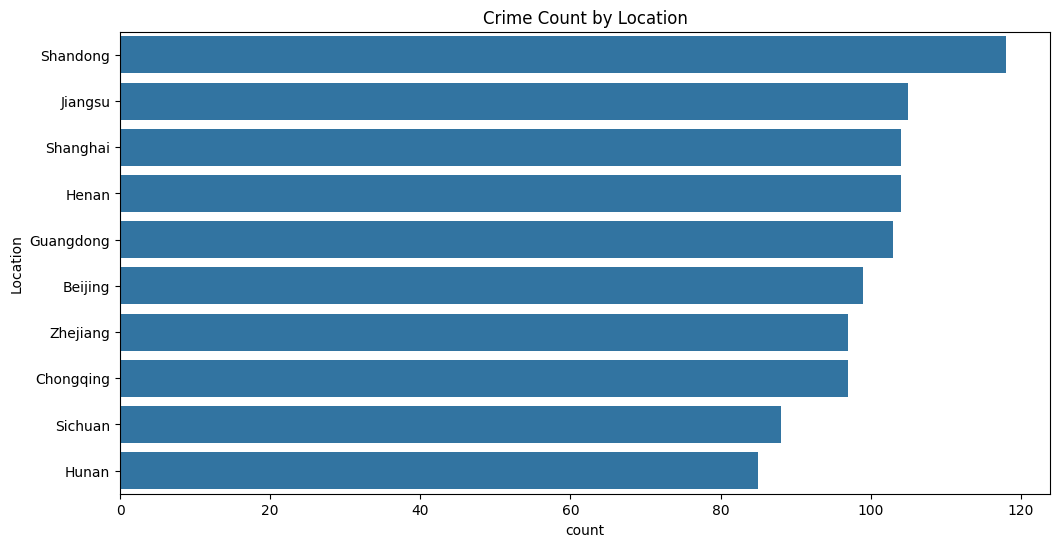

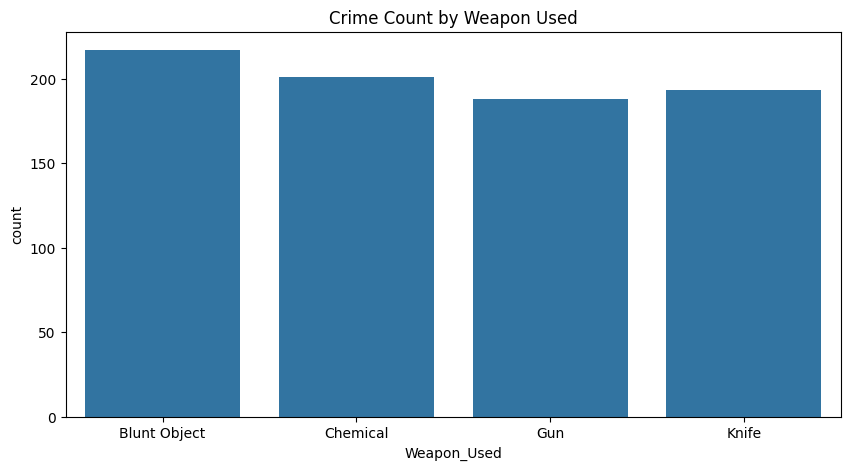

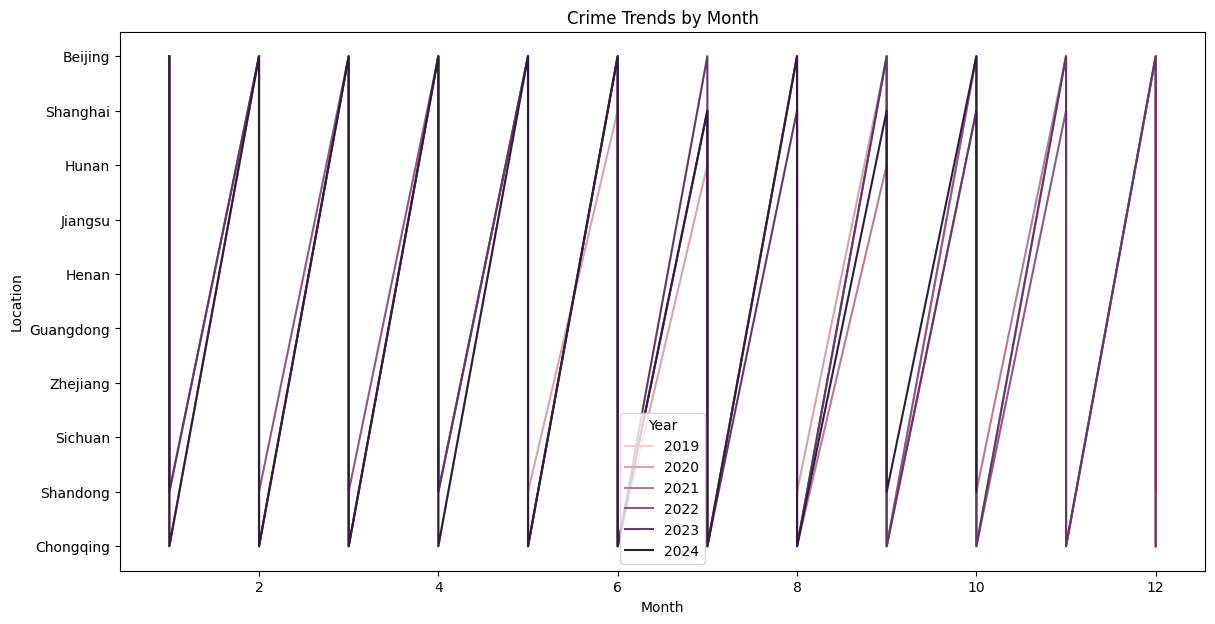

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\jpabb\\Downloads\\china_crime_dataset.csv")

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Basic statistics
print(df.describe())

# Crime count by Location
plt.figure(figsize=(12, 6))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Crime Count by Location')
plt.show()

# Distribution of crime types
plt.figure(figsize=(10, 5))
sns.countplot(x='Weapon_Used', data=df)
plt.title('Crime Count by Weapon Used')
plt.show()

# Crime trends over time
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Location', data=df, hue='Year', estimator=None)
plt.title('Crime Trends by Month')
plt.show()


In [40]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium

# Load the dataset
df = pd.read_csv("C:\\Users\\jpabb\\Downloads\\china_crime_dataset.csv")

# Define latitude and longitude for each city/province in the dataset
location_coords = {
    'Beijing': (39.9042, 116.4074),
    'Shanghai': (31.2304, 121.4737),
    'Guangdong': (23.3790, 113.7633),
    'Shandong': (36.6758, 121.4397),
    'Henan': (34.7655, 113.6254),
    'Sichuan': (30.6595, 104.0633),
    'Hunan': (28.1127, 112.9834),
    'Zhejiang': (29.1832, 120.0934),
    'Jiangsu': (32.0617, 118.7632),
    'Chongqing': (29.4316, 106.9123)
}

# Map the locations to their latitude and longitude
df['Latitude'] = df['Location'].map(lambda loc: location_coords[loc][0])
df['Longitude'] = df['Location'].map(lambda loc: location_coords[loc][1])

# Check the updated dataframe
print(df[['Location', 'Latitude', 'Longitude']].head())


   Location  Latitude  Longitude
0   Beijing   39.9042   116.4074
1   Beijing   39.9042   116.4074
2  Shanghai   31.2304   121.4737
3     Hunan   28.1127   112.9834
4   Jiangsu   32.0617   118.7632


In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium

# Load the crime dataset (CSV)
df = pd.read_csv("C:\\Users\\jpabb\\Downloads\\china_crime_dataset.csv")

# Define latitude and longitude for each city/province in the dataset
location_coords = {
    'Beijing': (39.9042, 116.4074),
    'Shanghai': (31.2304, 121.4737),
    'Guangdong': (23.3790, 113.7633),
    'Shandong': (36.6758, 121.4397),
    'Henan': (34.7655, 113.6254),
    'Sichuan': (30.6595, 104.0633),
    'Hunan': (28.1127, 112.9834),
    'Zhejiang': (29.1832, 120.0934),
    'Jiangsu': (32.0617, 118.7632),
    'Chongqing': (29.4316, 106.9123)
}

# Handle missing locations gracefully
df['Latitude'] = df['Location'].map(lambda loc: location_coords.get(loc, (None, None))[0])
df['Longitude'] = df['Location'].map(lambda loc: location_coords.get(loc, (None, None))[1])

# Drop rows where the location mapping failed (no Latitude or Longitude)
df = df.dropna(subset=['Latitude', 'Longitude'])

# Check if the dataframe is now valid
print(df.head())

# Create a GeoDataFrame for the crime incidents
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Correct path to the downloaded shapefile
shapefile_path = r"C:\\Users\\jpabb\\Downloads\\ne_110m_admin_0_countries.shp"

# Load the shapefile of the world map
try:
    world = gpd.read_file(shapefile_path)
except Exception as e:
    print(f"Error loading shapefile: {e}")
    world = None

if world is not None:
    print(world.columns)  # Check the column names
    china = world[world['ADMIN'] == 'China']

    # Plot crime incidents using GeoPandas and Matplotlib
    fig, ax = plt.subplots(figsize=(10, 10))
    china.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot China boundaries
    geo_df.plot(ax=ax, color='red', markersize=5)  # Plot crime incidents

    # Set titles and labels
    plt.title('Crime Incidents in China')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(73, 135)  # Approximate longitude bounds of China
    plt.ylim(18, 54)   # Approximate latitude bounds of China
    plt.grid()
    plt.show()

# Create an interactive map using Folium
m = folium.Map(location=[35.0, 105.0], zoom_start=5)

# Define color mapping for different crime types
crime_colors = {
    'Theft': 'blue',
    'Assault': 'red',
    'Burglary': 'green',
    'Fraud': 'purple',
    'Vandalism': 'orange',
}

# Calculate crime rates (if needed)
crime_rate = df['Crime_Type'].value_counts(normalize=True) * 100

# Add markers for each crime incident
for index, row in df.iterrows():
    crime_type = row['Crime_Type']
    crime_rate_value = crime_rate[crime_type] if crime_type in crime_rate else 0.0
    color = crime_colors.get(crime_type, 'gray')  # Default to gray if crime type not found

    # Create a marker with a popup
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Crime Type: {crime_type}<br>Crime Rate: {crime_rate_value:.2f}%",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Save the map to an HTML file
m.save('china_crime_map.html')

# Display the map (this will only work in Jupyter Notebook or compatible environments)
m
 

     Crime_Type  Location            Timestamp  Age  Gender   Weapon_Used  \
0   Cyber Crime   Beijing  2021-08-05 19:24:34   60  Female  Blunt Object   
1  Drug Offense   Beijing  2020-08-01 00:50:10   60    Male  Blunt Object   
2   Cyber Crime  Shanghai  2020-06-23 12:16:36   62    Male      Chemical   
3         Fraud     Hunan  2020-11-18 00:29:25   37    Male  Blunt Object   
4         Fraud   Jiangsu  2022-11-28 08:40:42   39    Male           NaN   

  Crime_Scene  Latitude  Longitude  
0      Public   39.9042   116.4074  
1     Private   39.9042   116.4074  
2      Public   31.2304   121.4737  
3      Public   28.1127   112.9834  
4      Public   32.0617   118.7632  
Error loading shapefile: C:\\Users\\jpabb\\Downloads\\ne_110m_admin_0_countries.shp: No such file or directory


   Latitude  Longitude
0   39.9042   116.4074
1   39.9042   116.4074
2   31.2304   121.4737
3   28.1127   112.9834
4   32.0617   118.7632


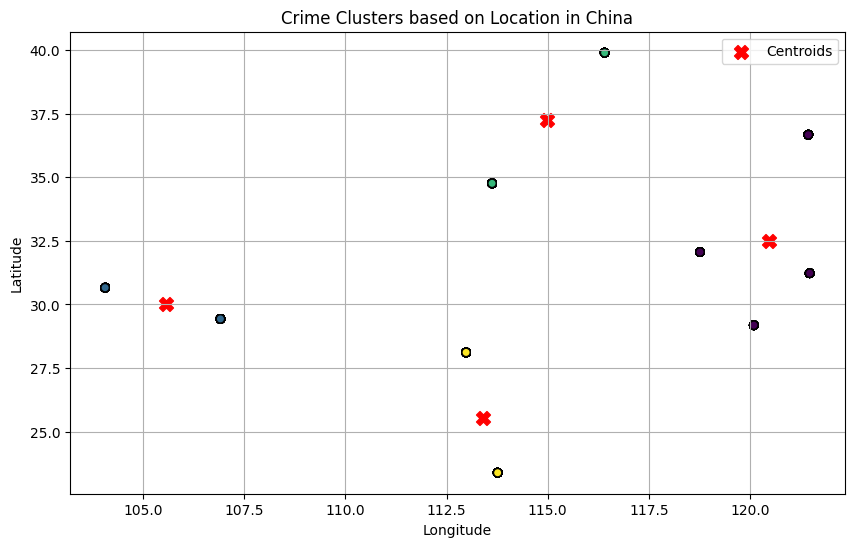

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print(df[['Latitude', 'Longitude']].head()) 

location_data = df[['Latitude', 'Longitude']].values
kmeans = KMeans(n_clusters=4, random_state=0).fit(location_data)

df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=100, label='Centroids', marker='X')

plt.title('Crime Clusters based on Location in China')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(True)
plt.legend()
plt.show()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Crime_Type   1000 non-null   object
 1   Location     1000 non-null   object
 2   Timestamp    1000 non-null   object
 3   Age          1000 non-null   int64 
 4   Gender       1000 non-null   object
 5   Weapon_Used  799 non-null    object
 6   Crime_Scene  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None

DataFrame Head:
     Crime_Type  Location            Timestamp  Age  Gender   Weapon_Used  \
0   Cyber Crime   Beijing  2021-08-05 19:24:34   60  Female  Blunt Object   
1  Drug Offense   Beijing  2020-08-01 00:50:10   60    Male  Blunt Object   
2   Cyber Crime  Shanghai  2020-06-23 12:16:36   62    Male      Chemical   
3         Fraud     Hunan  2020-11-18 00:29:25   37    Male  Blunt Object   
4         Fraud   Jiangsu  2022-11-28 08:40:42   39 

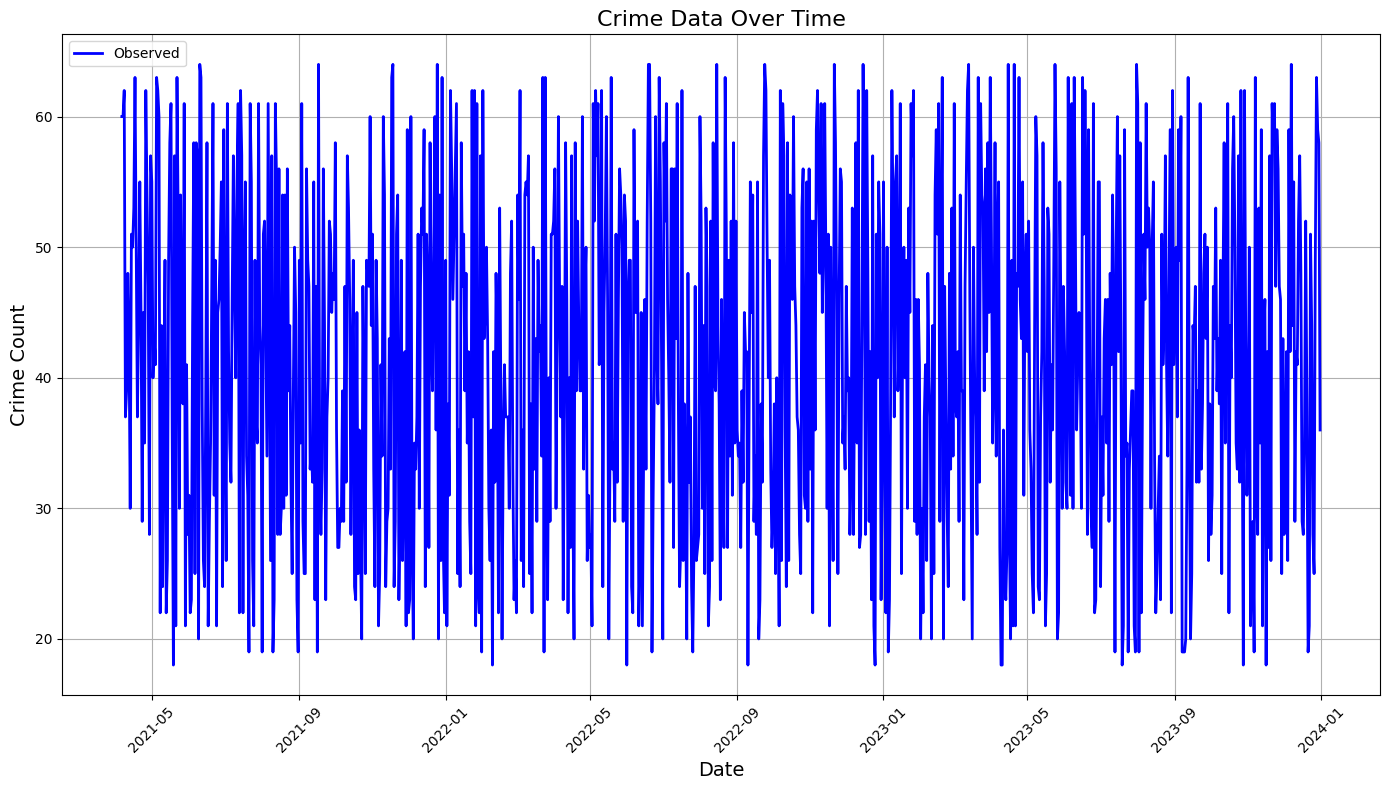

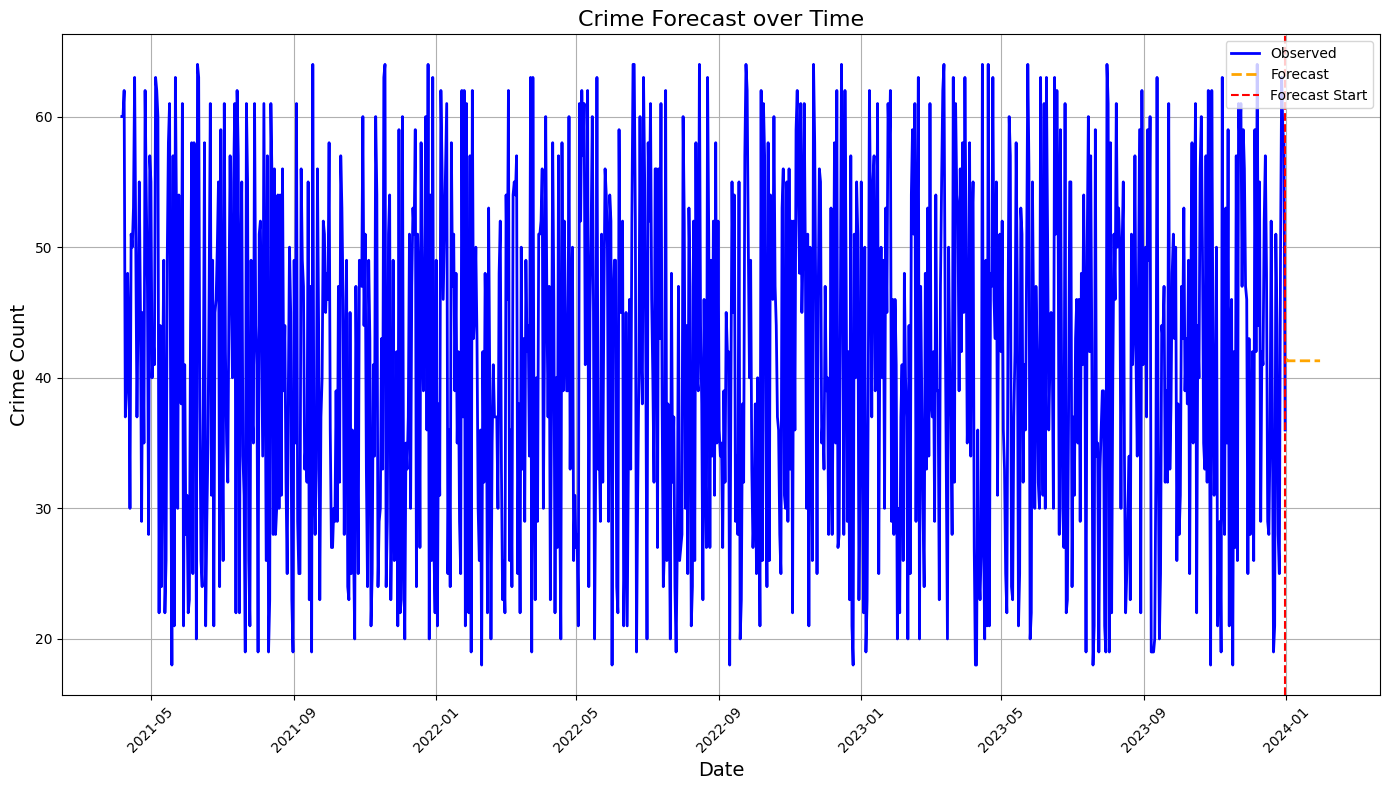

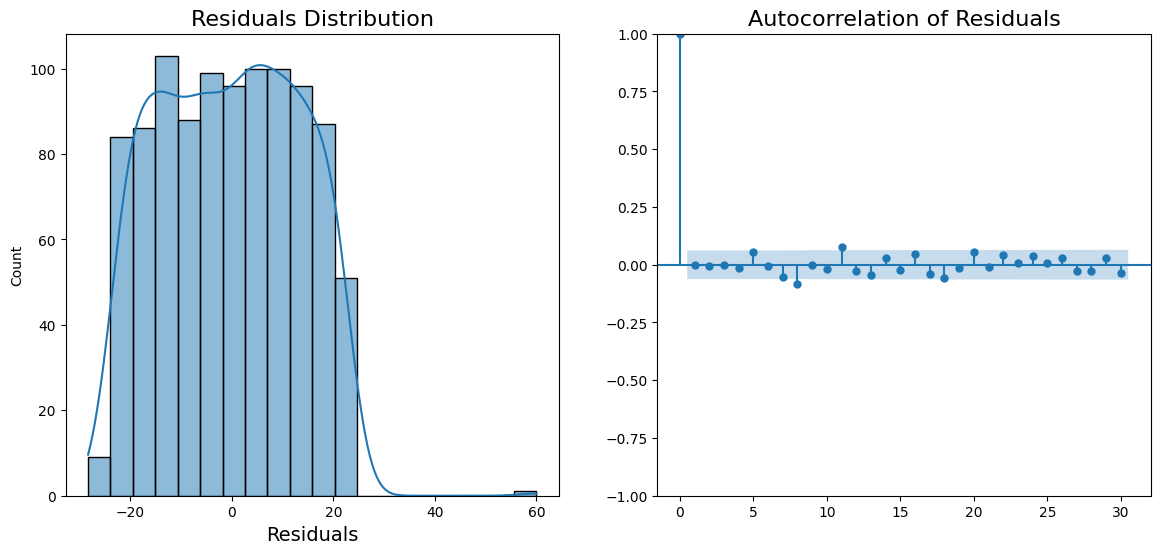

<Figure size 1200x600 with 0 Axes>

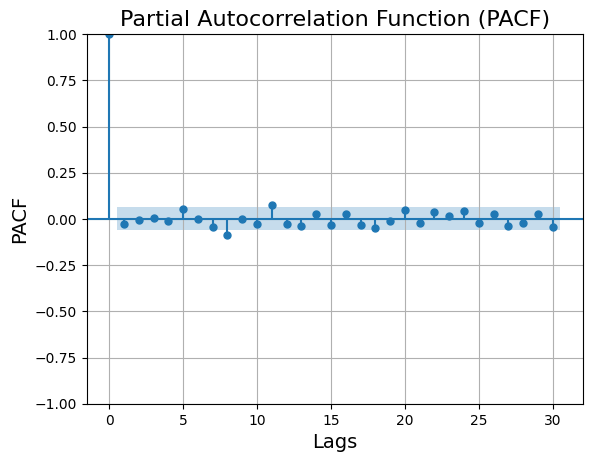

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def read_data_in_chunks(file_path, chunk_size=100000):
    chunks = pd.read_csv(file_path, chunksize=chunk_size)
    return pd.concat(chunk for chunk in chunks)  # Read all data

# Assume 'crime_data.csv' is your data file
df = read_data_in_chunks("C:\\Users\\jpabb\\Downloads\\china_crime_dataset.csv")

print("DataFrame Info:")
print(df.info())

print("\nDataFrame Head:")
print(df.head())

print("\nColumn Data Types:")
print(df.dtypes)

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nNumeric Columns:", numeric_columns.tolist())

if len(numeric_columns) == 0:
    raise ValueError("No numeric columns found in the dataset.")

# Select the first numeric column (adjust as needed)
crime_column = numeric_columns[0]
print(f"\nUsing column '{crime_column}' for analysis")

# Convert to numeric, handle errors, and drop NaN values
crime_series = pd.to_numeric(df[crime_column], errors='coerce')
crime_series = crime_series.dropna()

print("\nCrime Series Info:")
print(crime_series.describe())

# Check if we have enough data points
min_data_points = 10
if len(crime_series) < min_data_points:
    print(f"Warning: Only {len(crime_series)} valid data points. Using simple moving average instead of ARIMA.")
    # Use all available data points
    crime_series = crime_series.tail(len(crime_series))
else:
    # Use the last 1000 data points (or all if less than 1000)
    crime_series = crime_series.tail(1000)

# Create date index
crime_series.index = pd.date_range(end='2023-12-31', periods=len(crime_series), freq='D')
crime_series.name = 'Crime_Count'

print("\nFinal Crime Series Info:")
print(crime_series.describe())

# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(crime_series, label='Observed', color='blue', linewidth=2)
plt.title('Crime Data Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Crime Count', fontsize=14)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if len(crime_series) >= min_data_points:
    # ARIMA modeling
    model = ARIMA(crime_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future crime trends for the next 30 time steps
    forecast = model_fit.forecast(steps=30)
    forecast_index = pd.date_range(start=crime_series.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Plotting observed data and forecast
    plt.figure(figsize=(14, 8))
    plt.plot(crime_series, label='Observed', color='blue', linewidth=2)
    plt.plot(forecast_series, label='Forecast', color='orange', linestyle='--', linewidth=2)
    plt.title('Crime Forecast over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.axvline(x=crime_series.index[-1], color='red', linestyle='--', label='Forecast Start', linewidth=1.5)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Residual Analysis
    residuals = model_fit.resid
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution', fontsize=16)
    plt.xlabel('Residuals', fontsize=14)
    plt.subplot(1, 2, 2)
    plot_acf(residuals, lags=30, ax=plt.gca())
    plt.title('Autocorrelation of Residuals', fontsize=16)
    plt.show()

    # Plotting PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(crime_series, lags=30)
    plt.title('Partial Autocorrelation Function (PACF)', fontsize=16)
    plt.xlabel('Lags', fontsize=14)
    plt.ylabel('PACF', fontsize=14)
    plt.grid()
    plt.show()
else:
    print("Not enough data for ARIMA modeling and advanced analysis.")
    # Simple moving average forecast
    window = max(2, len(crime_series) // 2)
    ma = crime_series.rolling(window=window).mean()
    plt.figure(figsize=(14, 8))
    plt.plot(crime_series, label='Observed', color='blue', linewidth=2)
    plt.plot(ma, label=f'{window}-day Moving Average', color='red', linewidth=2)
    plt.title('Crime Data with Moving Average', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

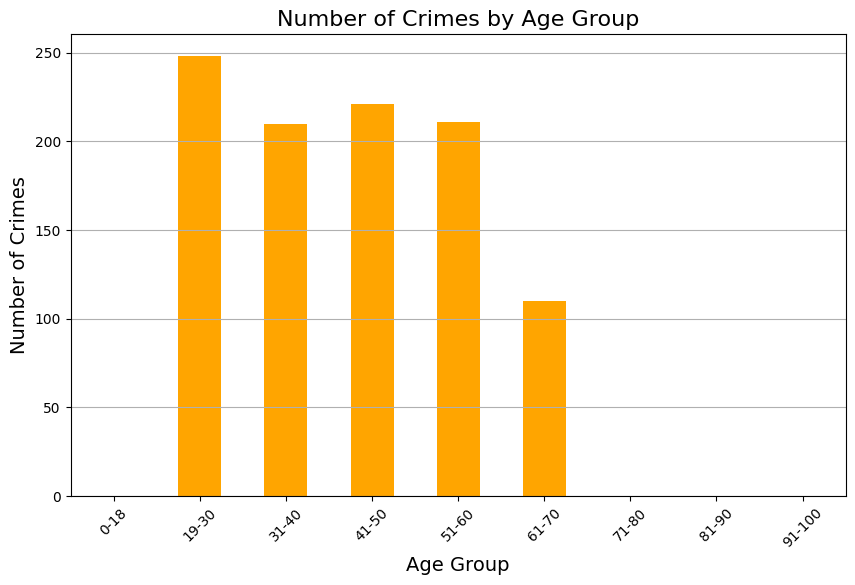

In [65]:
# Create age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of crimes in each age group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Plot a bar plot for age groups
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='orange')
plt.title('Number of Crimes by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load your dataset (assuming df is already defined)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line if you need to load the dataset

# Prepare data for classification
# In your dataset, 'Age' is the only numeric feature we can use, we can use 'Crime_Type' as the target
X = df[['Age']]  # Using only 'Age' as a feature
y = df['Crime_Type']  # Assuming 'Crime_Type' represents the classes we want to predict

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.15333333333333332
              precision    recall  f1-score   support

     Assault       0.17      0.12      0.14        52
    Burglary       0.21      0.23      0.22        40
 Cyber Crime       0.09      0.06      0.07        47
Drug Offense       0.20      0.18      0.19        34
       Fraud       0.00      0.00      0.00        43
       Theft       0.13      0.27      0.17        37
   Vandalism       0.19      0.26      0.22        47

    accuracy                           0.15       300
   macro avg       0.14      0.16      0.14       300
weighted avg       0.14      0.15      0.14       300

